In [2]:
# imports
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import numpy as np
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score
from scipy.stats import mode
from sklearn.metrics import confusion_matrix

In [3]:
# Készíts egy függvényt ami betölti a digits datasetet 
# NOTE: használd az sklearn load_digits-et
# Függvény neve: load_digits()
# Függvény visszatérési értéke: a load_digits visszatérési értéke
from sklearn.datasets import load_digits

def load_digs():
    return load_digits()


In [9]:
# Vizsgáld meg a betöltött adatszetet (milyen elemek vannak benne stb.)

digits = load_digits()
print(digits.feature_names)
print(digits.target_names)
print(digits.target)

['pixel_0_0', 'pixel_0_1', 'pixel_0_2', 'pixel_0_3', 'pixel_0_4', 'pixel_0_5', 'pixel_0_6', 'pixel_0_7', 'pixel_1_0', 'pixel_1_1', 'pixel_1_2', 'pixel_1_3', 'pixel_1_4', 'pixel_1_5', 'pixel_1_6', 'pixel_1_7', 'pixel_2_0', 'pixel_2_1', 'pixel_2_2', 'pixel_2_3', 'pixel_2_4', 'pixel_2_5', 'pixel_2_6', 'pixel_2_7', 'pixel_3_0', 'pixel_3_1', 'pixel_3_2', 'pixel_3_3', 'pixel_3_4', 'pixel_3_5', 'pixel_3_6', 'pixel_3_7', 'pixel_4_0', 'pixel_4_1', 'pixel_4_2', 'pixel_4_3', 'pixel_4_4', 'pixel_4_5', 'pixel_4_6', 'pixel_4_7', 'pixel_5_0', 'pixel_5_1', 'pixel_5_2', 'pixel_5_3', 'pixel_5_4', 'pixel_5_5', 'pixel_5_6', 'pixel_5_7', 'pixel_6_0', 'pixel_6_1', 'pixel_6_2', 'pixel_6_3', 'pixel_6_4', 'pixel_6_5', 'pixel_6_6', 'pixel_6_7', 'pixel_7_0', 'pixel_7_1', 'pixel_7_2', 'pixel_7_3', 'pixel_7_4', 'pixel_7_5', 'pixel_7_6', 'pixel_7_7']
[0 1 2 3 4 5 6 7 8 9]
[0 1 2 ... 8 9 8]


[ 0.         -0.33501649 -0.04308102  0.27407152 -0.66447751 -0.84412939
 -0.40972392 -0.12502292 -0.05907756 -0.62400926  0.4829745   0.75962245
 -0.05842586  1.12772113  0.87958306 -0.13043338 -0.04462507  0.11144272
  0.89588044 -0.86066632 -1.14964846  0.51547187  1.90596347 -0.11422184
 -0.03337973  0.48648928  0.46988512 -1.49990136 -1.61406277  0.07639777
  1.54181413 -0.04723238  0.          0.76465553  0.05263019 -1.44763006
 -1.73666443  0.04361588  1.43955804  0.         -0.06134367  0.8105536
  0.63011714 -1.12245711 -1.06623158  0.66096475  0.81845076 -0.08874162
 -0.03543326  0.74211893  1.15065212 -0.86867056  0.11012973  0.53761116
 -0.75743581 -0.20978513 -0.02359646 -0.29908135  0.08671869  0.20829258
 -0.36677122 -1.14664746 -0.5056698  -0.19600752]

[ 0.  0.  5. 13.  9.  1.  0.  0.  0.  0. 13. 15. 10. 15.  5.  0.  0.  3.
 15.  2.  0. 11.  8.  0.  0.  4. 12.  0.  0.  8.  8.  0.  0.  5.  8.  0.
  0.  9.  8.  0.  0.  4. 11.  0.  1. 12.  7.  0.  0.  2. 14.  5. 10. 12.
 

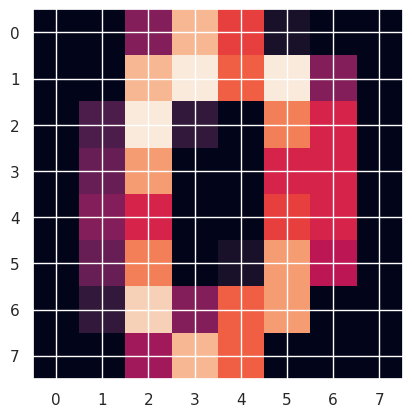

In [10]:
# Vizsgáld meg a data paraméterét a digits dataset-nek (tartalom,shape...)

from sklearn.preprocessing import scale

print(scale(digits.data)[0])
print()
print(digits.data[0])
print(digits.target)
print("Shape: ", scale(digits.data).shape)

plt.imshow(digits.data[0].reshape(8,8))

In [12]:
# Készíts egy függvényt ami létrehoz egy KMeans model-t 10 db cluster-el
# NOTE: használd az sklearn Kmeans model-jét (random_state legyen 0)
# Miután megvan a model predict-elj vele 
# NOTE: használd a fit_predict-et
# Függvény neve: predict(n_clusters:int,random_state:int,digits)
# Függvény visszatérési értéke: (model:sklearn.cluster.KMeans,clusters:np.ndarray)

from sklearn.cluster import KMeans

def predict(n_clusters:int,random_state:int,digits):
    model = KMeans(n_clusters=n_clusters, random_state=random_state)

    clusters = model.fit_predict(digits.data)
    return model, clusters


model, y_pred = predict(10,0,digits)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [13]:
# Vizsgáld meg a shape-jét a kapott model cluster_centers_ paraméterének.

centroids = model.cluster_centers_
print(centroids.shape)
print(centroids[0])

(10, 64)
[ 0.00000000e+00  2.22044605e-16  3.07228916e-01  7.16265060e+00
  1.19457831e+01  1.93373494e+00  1.50602410e-01  5.42168675e-02
  1.73472348e-18  1.20481928e-02  3.28313253e+00  1.37951807e+01
  8.46385542e+00  1.53012048e+00  9.75903614e-01  2.77108434e-01
  8.67361738e-19  6.44578313e-01  1.07108434e+01  1.15602410e+01
  4.33734940e+00  5.25903614e+00  3.87349398e+00  3.25301205e-01
  6.02409639e-03  4.75903614e+00  1.47590361e+01  5.86144578e+00
  6.87951807e+00  1.07530120e+01  6.21686747e+00  1.80722892e-02
  0.00000000e+00  8.92771084e+00  1.48072289e+01  9.35542169e+00
  1.28132530e+01  1.43915663e+01  5.48192771e+00  0.00000000e+00
  9.63855422e-02  6.50602410e+00  1.16867470e+01  1.23433735e+01
  1.48373494e+01  1.07590361e+01  1.56626506e+00  0.00000000e+00
  6.02409639e-02  1.11445783e+00  3.00000000e+00  7.77710843e+00
  1.40843373e+01  4.13253012e+00  1.80722892e-02  1.11022302e-16
 -5.42101086e-19  2.40963855e-02  3.73493976e-01  7.96385542e+00
  1.23253012e+01

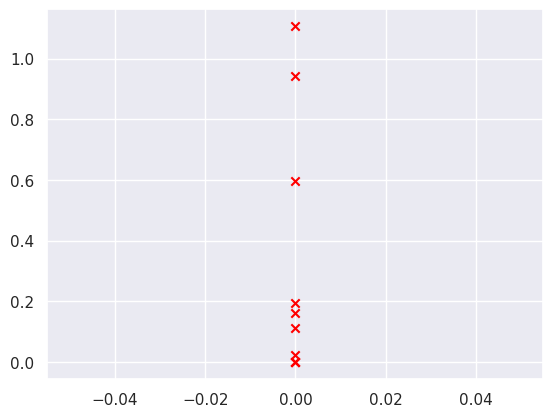

In [14]:
# Készíts egy plotot ami a cluster középpontokat megjeleníti
plt.scatter(model.cluster_centers_[:, 0], model.cluster_centers_[:, 1], marker='x', color='red')
plt.show()


In [15]:
# Készíts egy függvényt ami visszaadja a predictált cluster osztályokat
# NOTE: amit a predict-ből visszakaptunk "clusters" azok lesznek a predictált cluster osztályok
# HELP: amit a model predictált cluster osztályok még nem a labelek, hanem csak random cluster osztályok, 
#       Hogy label legyen belőlük:
#       1. készíts egy result array-t ami ugyan annyi elemű mint a predictált cluster array
#       2. menj végig mindegyik cluster osztályon (0,1....9)
#       3. készíts egy maszkot ami az adott cluster osztályba tartozó elemeket adja vissza
#       4. a digits.target-jét indexeld meg ezzel a maszkkal
#       5. számold ki ennel a subarray-nek a móduszát
#       6. a result array-ben tedd egyenlővé a módusszal azokat az indexeket ahol a maszk True 
#       Erre azért van szükség mert semmi nem biztosítja nekünk azt, hogy a "0" cluster a "0" label lesz, lehet, hogy az "5" label lenne az.

# Függvény neve: get_labels(clusters:np.ndarray, digits)
# Függvény visszatérési értéke: labels:np.ndarray


def get_labels(clusters:np.ndarray, digits):
    result = np.zeros_like(clusters)
    for cluster in range(10):
        mask = (clusters == cluster)
        labels_in_cluster = digits.target[mask]
        mode = np.bincount(labels_in_cluster).argmax()
        result[mask] = mode
    return result


labels = get_labels(y_pred, digits)
labels


array([0, 8, 8, ..., 8, 9, 9], dtype=int32)

In [16]:
# Készíts egy függvényt ami kiszámolja a model accuracy-jét
# Függvény neve: calc_accuracy(target_labels:np.ndarray,predicted_labels:np.ndarray)
# Függvény visszatérési értéke: accuracy:float
# NOTE: Kerekítsd 2 tizedes jegyre az accuracy-t

from sklearn.model_selection import train_test_split


def calc_accuracy(target_labels:np.ndarray, predicted_labels:np.ndarray):
    num_correct = np.sum(target_labels == predicted_labels)
    accuracy = num_correct / len(target_labels)
    return round(accuracy, 2)

X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target, test_size=0.2, random_state=42)
y_test



array([6, 9, 3, 7, 2, 1, 5, 2, 5, 2, 1, 9, 4, 0, 4, 2, 3, 7, 8, 8, 4, 3,
       9, 7, 5, 6, 3, 5, 6, 3, 4, 9, 1, 4, 4, 6, 9, 4, 7, 6, 6, 9, 1, 3,
       6, 1, 3, 0, 6, 5, 5, 1, 9, 5, 6, 0, 9, 0, 0, 1, 0, 4, 5, 2, 4, 5,
       7, 0, 7, 5, 9, 5, 5, 4, 7, 0, 4, 5, 5, 9, 9, 0, 2, 3, 8, 0, 6, 4,
       4, 9, 1, 2, 8, 3, 5, 2, 9, 0, 4, 4, 4, 3, 5, 3, 1, 3, 5, 9, 4, 2,
       7, 7, 4, 4, 1, 9, 2, 7, 8, 7, 2, 6, 9, 4, 0, 7, 2, 7, 5, 8, 7, 5,
       7, 7, 0, 6, 6, 4, 2, 8, 0, 9, 4, 6, 9, 9, 6, 9, 0, 3, 5, 6, 6, 0,
       6, 4, 3, 9, 3, 9, 7, 2, 9, 0, 4, 5, 3, 6, 5, 9, 9, 8, 4, 2, 1, 3,
       7, 7, 2, 2, 3, 9, 8, 0, 3, 2, 2, 5, 6, 9, 9, 4, 1, 5, 4, 2, 3, 6,
       4, 8, 5, 9, 5, 7, 8, 9, 4, 8, 1, 5, 4, 4, 9, 6, 1, 8, 6, 0, 4, 5,
       2, 7, 4, 6, 4, 5, 6, 0, 3, 2, 3, 6, 7, 1, 5, 1, 4, 7, 6, 8, 8, 5,
       5, 1, 6, 2, 8, 8, 9, 9, 7, 6, 2, 2, 2, 3, 4, 8, 8, 3, 6, 0, 9, 7,
       7, 0, 1, 0, 4, 5, 1, 5, 3, 6, 0, 4, 1, 0, 0, 3, 6, 5, 9, 7, 3, 5,
       5, 9, 9, 8, 5, 3, 3, 2, 0, 5, 8, 3, 4, 0, 2,

<Axes: >

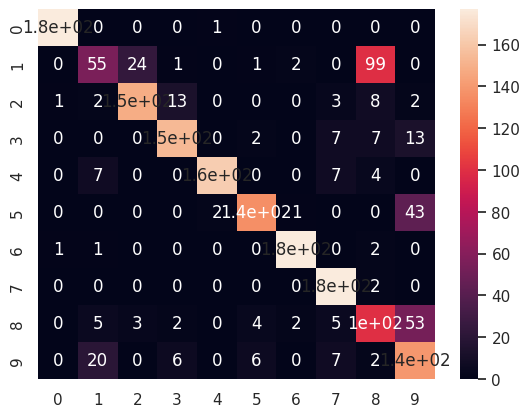

In [18]:
# Készíts egy confusion mátrixot és plot-old seaborn segítségével

conf_mx = confusion_matrix(digits.target, labels)
sns.heatmap(conf_mx, annot=True)
